# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [0]:
attrition_data.head()
attrition_data.shape

(1028, 34)

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
# importing libraries
import numpy as np


In [0]:
#### preprocessing starts
columns = attrition_data.columns
columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'ID'],
      dtype='object')

In [0]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

In [0]:
attrition_data = attrition_data.drop(['EmployeeCount', 'EmployeeNumber', 'ID'],axis=1)
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EnvironmentSatisfaction   1028 non-null   int64 
 9   Gender                    1028 non-null   object
 10  HourlyRate                1028 non-null   int64 
 11  JobInvolvement            1028 non-null   int64 
 12  JobLevel                  1028 non-null   int64 
 13  JobRole                   1028 non-null   object
 14  JobSatisfaction         

In [0]:
categorical_columns = ['BusinessTravel', 'Department', 'EducationField','Gender', 
                       'JobRole','MaritalStatus', 'OverTime']
outputs = ['Attrition']

In [0]:
##this is way from scratch to implement One-hot encoding
attrition_data_final = attrition_data
for col in categorical_columns:
  # print(col)
  Xdummies = []
  Xdummies = pd.get_dummies(attrition_data_final[col])
  # Xdummies.info()
  Xdummies = Xdummies.drop(Xdummies.columns[0], axis = 1)
  attrition_data_final = attrition_data_final.drop([col], axis='columns')
  attrition_data_final = pd.concat([attrition_data_final,Xdummies],axis='columns')
attrition_data_final.info()
# final = final.drop(['west windsor'], axis='columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1028 non-null   int64
 1   Attrition                 1028 non-null   int64
 2   DailyRate                 1028 non-null   int64
 3   DistanceFromHome          1028 non-null   int64
 4   Education                 1028 non-null   int64
 5   EnvironmentSatisfaction   1028 non-null   int64
 6   HourlyRate                1028 non-null   int64
 7   JobInvolvement            1028 non-null   int64
 8   JobLevel                  1028 non-null   int64
 9   JobSatisfaction           1028 non-null   int64
 10  MonthlyIncome             1028 non-null   int64
 11  MonthlyRate               1028 non-null   int64
 12  NumCompaniesWorked        1028 non-null   int64
 13  PercentSalaryHike         1028 non-null   int64
 14  PerformanceRating         1028 non-null 

In [0]:
# time to implement various models

# # import the important packages
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [0]:
x = attrition_data_final.drop(outputs, axis = 1)
y = attrition_data_final[outputs]
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size= 0.2, random_state=42,shuffle=True)
print('training set',x_train.shape)
print('validation set', x_val.shape)

training set (822, 44)
validation set (206, 44)


In [0]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score 

# clf = AdaBoostClassifier()
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_val)
# Acc = accuracy_score(y_val, y_pred)

# print(Acc)

In [0]:
# building the classifier
# Deep Learning------It gave very low accuracy I guess because the training dataset size is small ---val_acc=0.85
# clf = MLPClassifier(hidden_layer_sizes=(10,5,3), activation='relu', solver='adam', alpha=0.3, batch_size=200, learning_rate=  'adaptive', learning_rate_init=0.01
#                     , max_iter=200, shuffle=True, random_state=42, momentum=0.9, nesterovs_momentum=True,
#                     early_stopping=True, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=100,verbose=False)# accuracy =0.8689320388349514

# # Random Forest Classifier
# clf = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
#                              max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None,
#                               verbose=1, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)# accuracy = 0.8689320388349514

# #Support Vector Machine-----I tried various values of the parameters but the accuracy was low for all
# clf = svm.SVC(C=0.01, kernel='rbf', degree=3, gamma=0.1, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
#               max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None) # accuracy = 0.8592233009708737

# rng = np.random.RandomState(1)
# clf = AdaBoostClassifier(RandomForestClassifier(n_estimators = 1000, max_depth = 3),n_estimators=10000, random_state=47)
# 0.8592233009708737

## I got the best results for AdaBoost classifier with the default values of the free parameters, 
## this ensemble classifier combines multiple classifiers to increase the accuracy of classifiers
## It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.
## Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
## This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
# clf = AdaBoostClassifier() #accuracy = 0.8689320388349514

# clf = GradientBoostingClassifier()# accuracy= 0.8689320388349514

# clf = HistGradientBoostingClassifier()# accuracy = 0.8786407766990292

# svc=svm.SVC(probability=True, kernel='rbf')
# clf = AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)# accuracy = 0.8592233009708737

# clf = GaussianNB() #accuracy = 0.7281553398058253


# for ploy
# clf = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.01, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
#               max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)# accuracy = 0.8592233009708737

# # Decision Tree Classifier
# clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#                              max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
#                              class_weight=None, presort='deprecated', ccp_alpha=0.0) #accuracy = 0.8058252427184466

In [0]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
Acc = accuracy_score(y_val, y_pred)
Acc

0.8058252427184466

In [0]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[155,  22],
       [ 18,  11]])

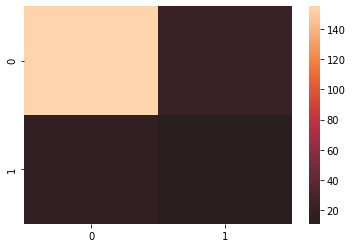

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, center=True)
plt.show()

In [0]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_val, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

from sklearn.metrics import recall_score
print('Average precision-recall score: ', recall_score(y_val, y_pred))


Average precision-recall score: 0.21
Average precision-recall score:  0.3793103448275862


In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# y_val.shape
# fpr, tpr = roc_curve(y_val, y_pred)
# auc_svm = auc(fpr, tpr)

# plt.figure(figsize=(5, 5), dpi=100)
# plt.plot(fpr, tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
# plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

# n_classes = y_val.shape[1]
# fpr = []
# tpr = []
# roc_auc = []
# for i in range(y_val.shape[0]):
#     print(roc_curve(y_val[i], y_pred[i]))
#     # roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])